In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("train(1)(train(1)).csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
df.shape

(16209, 21)

In [ ]:
df.dtypes

,0
id,int64
date,object
price,int64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [ ]:
df.drop(columns=['id', 'date'], inplace=True)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

In [ ]:
price_corr = numeric_df.corr()['price'].sort_values(ascending=False)
price_corr

,price
price,1.000000
sqft_living,0.700933
grade,0.664266
sqft_above,0.602648
sqft_living15,0.581781
bathrooms,0.525487
view,0.390534
sqft_basement,0.320301
lat,0.310008
bedrooms,0.304454


In [ ]:
price_corr = price_corr.drop('price')

/tmp/ipython-input-1589659727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


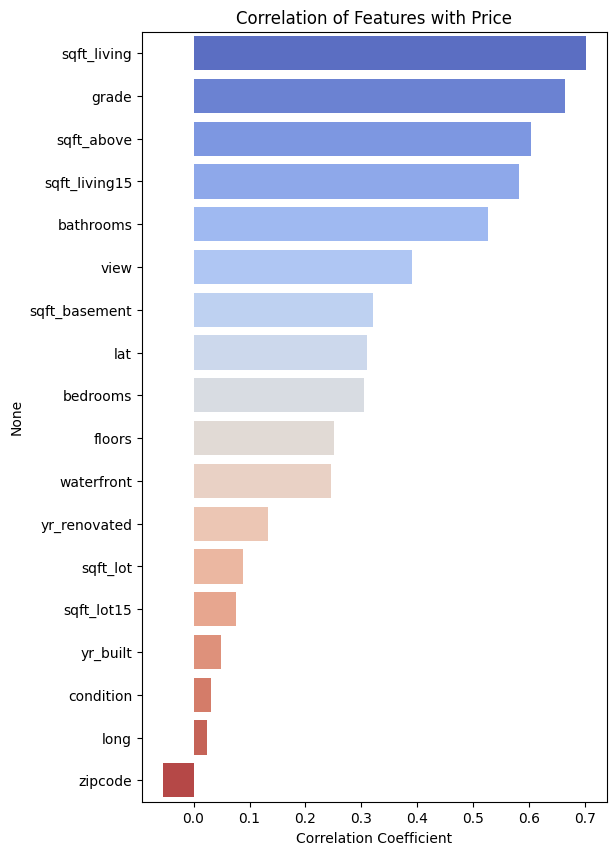

In [ ]:
plt.figure(figsize=(6, 10))
sns.barplot(
    x=price_corr.values,
    y=price_corr.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Price')
plt.xlabel('Correlation Coefficient')
plt.show()

In [ ]:
corr_matrix = numeric_df.corr()

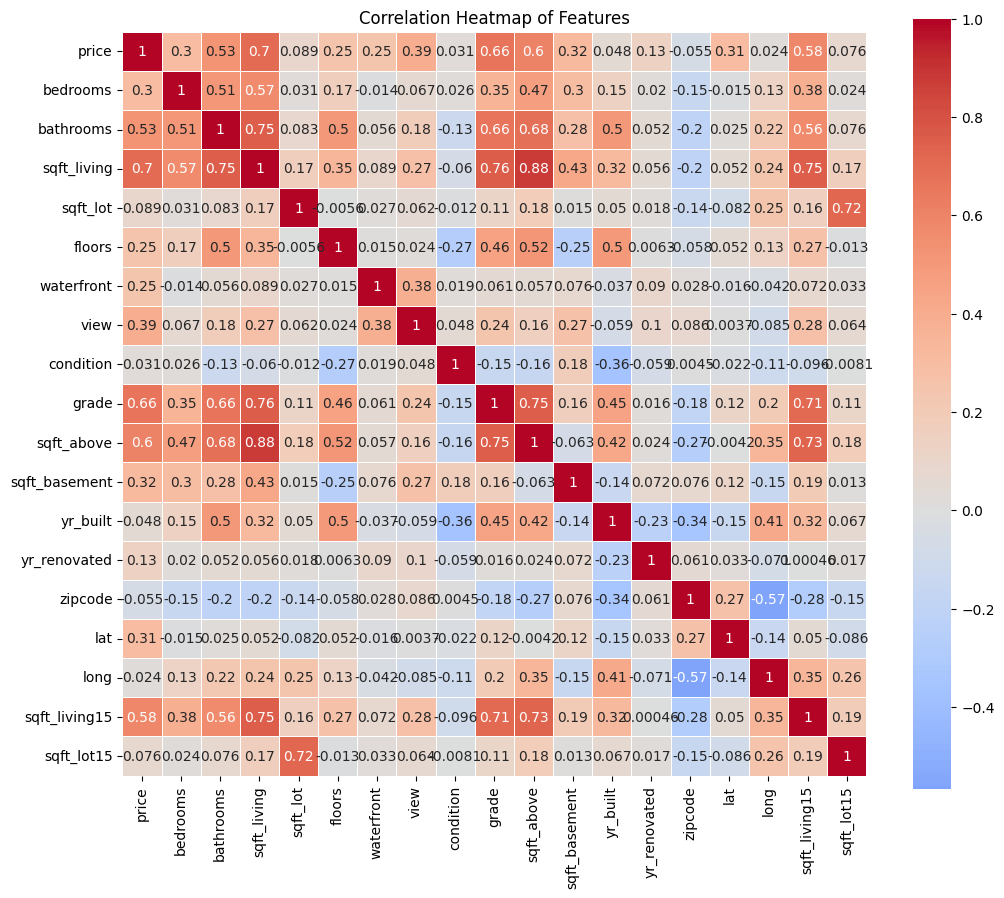

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Features")
plt.show()

# sqft_lot , condition , yr_built , zipcode , long , sqft_lot15 , Correlation values are two low for them #

# but some feature lat . #


In [ ]:
data_1X = df.drop(columns=['sqft_lot', 'condition' , 'yr_built' , 'zipcode' , 'long' , 'sqft_lot15' , 'price'])
data_1X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,4,2.25,1810,2.0,0,0,7,1810,0,0,47.4362,1660
1,3,2.50,1600,2.0,0,0,7,1600,0,0,47.4034,1720
2,4,2.50,1720,2.0,0,0,8,1720,0,0,47.2704,1870
3,2,2.25,1240,2.0,0,0,7,1150,90,0,47.5321,1240
4,3,2.00,1280,1.0,0,0,7,1280,0,0,47.3715,1590


In [ ]:
data_1Y = df['price']
data_1Y.head()

,price
0,268643
1,245000
2,200000
3,352499
4,232000


<Axes: xlabel='sqft_lot', ylabel='price'>

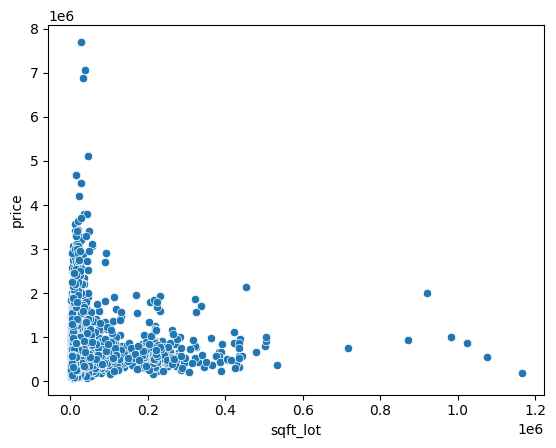

In [ ]:
sns.scatterplot(x='sqft_lot', y='price', data=df)


<Axes: xlabel='condition', ylabel='price'>

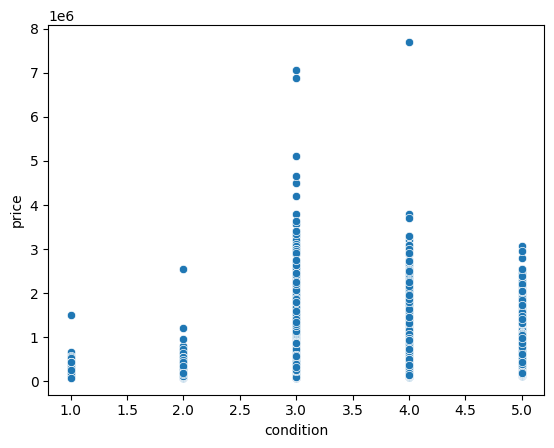

In [ ]:
sns.boxplot(x='condition', y='price', data=df)


<Axes: xlabel='condition', ylabel='price'>

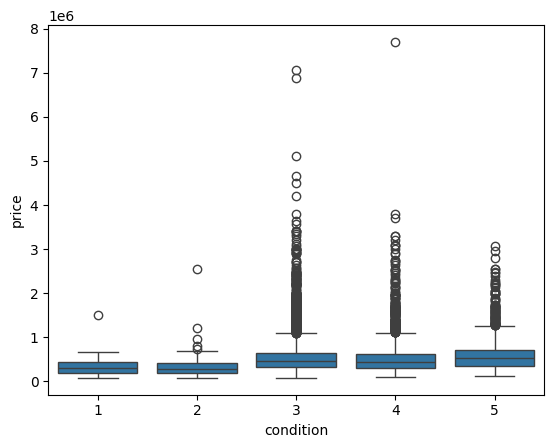

In [ ]:
sns.boxplot(x='condition', y='price', data=df)

<Axes: xlabel='grade', ylabel='price'>

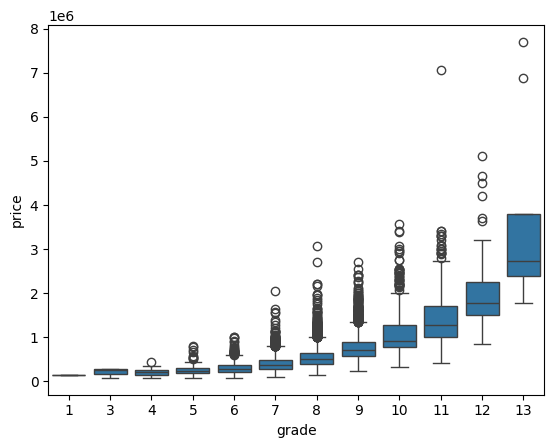

In [ ]:
sns.boxplot(x='grade', y='price', data=df)


<Axes: xlabel='view', ylabel='price'>

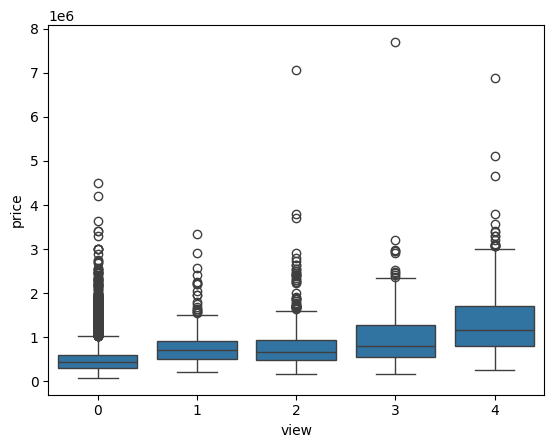

In [ ]:
sns.boxplot(x='view', y='price', data=df)



<Axes: xlabel='waterfront', ylabel='price'>

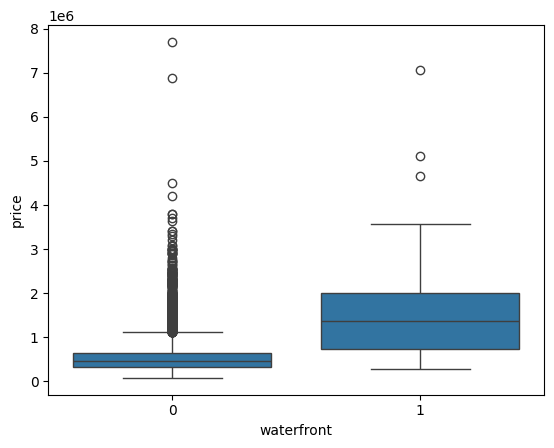

In [ ]:
sns.boxplot(x='waterfront', y='price', data=df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#BASELINE MODEL #

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_baseline = lr.predict(X_val)

In [ ]:
mse = mean_squared_error(y_val, y_pred_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_baseline)

rmse, r2


(np.float64(191661.40667528837), 0.7072714828801271)

# MODEL 1 from major linear fitting data

In [ ]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(
    data_1X, data_1Y, test_size=0.2, random_state=42
)

In [ ]:
lr_1 = LinearRegression()
lr_1.fit(X_train_1, y_train_1)

LinearRegression()

In [ ]:
y_pred_1X = lr_1.predict(X_val_1)

In [ ]:
mse_1X = mean_squared_error(y_val_1, y_pred_1X)
rmse_1X = np.sqrt(mse_1X)
r2_1X = r2_score(y_val_1, y_pred_1X)

rmse_1X, r2_1X

(np.float64(205786.12529417948), 0.6625356734597302)

# correlation is not only good aspect #

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# (np.float64(62838.92605628006), 0.9698314634389453) earlier from random forest with max_depth = none.


In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

rmse_rf, r2_rf

(np.float64(129683.90540698572), 0.8659805437217634)

In [ ]:
y_train_pred_rf = rf.predict(X_train)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

rmse_train_rf, r2_train_rf


(np.float64(63436.51839183001), 0.9692549350998056)

In [ ]:
from xgboost import XGBRegressor

# XG boost model for better non linear interpretation of data

In [ ]:
xgb = XGBRegressor(
    n_estimators=500,          # number of trees
    learning_rate=0.05,        # small learning rate = stable training
    max_depth=6,               # tree depth
    subsample=0.8,              # row sampling (regularization)
    colsample_bytree=0.8,       # feature sampling
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [ ]:
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
r2_xgb = r2_score(y_val, y_pred_xgb)

rmse_xgb, r2_xgb


(np.float64(115244.7024378995), 0.8941629528999329)

In [ ]:
y_train_pred_xgb = xgb.predict(X_train)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

rmse_train_xgb, r2_train_xgb


(np.float64(53518.548261327116), 0.978117048740387)

# MULTIMODAL PRACTICE #

In [3]:
df_test =  pd.read_csv("test2(test(1)).csv")
df_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [9]:
df_test.shape

(5404, 20)

#  Feature Extraction #

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from PIL import Image
from tqdm import tqdm
import torchvision.models as models
import torchvision.transforms as transforms

In [ ]:
# PATHS

CSV_PATH = "Data/train(1)(train(1)).csv"
IMAGE_DIR = "sat_images"
FEATURE_DIR = "features"
FEATURE_PATH = os.path.join(FEATURE_DIR, "resnet50_features.npy")

os.makedirs(FEATURE_DIR, exist_ok=True)



In [ ]:
# DEVICE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


# LOAD DATA

df = pd.read_csv(CSV_PATH)
print("Total samples:", len(df))


# LOAD PRETRAINED CNN

cnn = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
cnn = torch.nn.Sequential(*list(cnn.children())[:-1])
cnn.eval().to(device)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
# FEATURE EXTRACTION FUNCTION

def extract_cnn_features(image_path):
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        feat = cnn(img)

    return feat.squeeze().cpu().numpy()  


# MAIN EXTRACTION LOOP

image_features = []
bad_indices = []

for idx in tqdm(df.index):
    img_path = os.path.join(IMAGE_DIR, f"{idx}.png")

    try:
        feat = extract_cnn_features(img_path)
        image_features.append(feat)

    except Exception as e:
        print(f"[SKIPPED] index {idx}: {e}")
        image_features.append(np.zeros(2048))
        bad_indices.append(idx)

In [ ]:
# SAVE FEATURES

image_features = np.array(image_features)
np.save(FEATURE_PATH, image_features)

print("\n Feature extraction completed")
print("Feature matrix shape:", image_features.shape)
print("Corrupted / missing images:", len(bad_indices))
print("Saved to:", FEATURE_PATH)

# Geospatial Analysis #


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# PATHS

DATA_PATH = "Data/train(1)(train(1)).csv"
CNN_FEATURE_PATH = "features/resnet50_features.npy"
PLOT_DIR = "plots"

os.makedirs(PLOT_DIR, exist_ok=True)

In [ ]:
# LOAD DATA

df = pd.read_csv(DATA_PATH)
image_features = np.load(CNN_FEATURE_PATH)

print("Data shape:", df.shape)
print("CNN features shape:", image_features.shape)


# CREATE GEODATAFRAME

gdf = gpd.GeoDataFrame(
    df,
    geometry=[Point(xy) for xy in zip(df["long"], df["lat"])],
    crs="EPSG:4326"
)

In [ ]:
# PRICE SPATIAL DISTRIBUTION

plt.figure(figsize=(8,6))
plt.scatter(
    gdf["long"], gdf["lat"],
    c=gdf["price"],
    cmap="viridis",
    s=8
)
plt.colorbar(label="House Price")
plt.title("Spatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/price_spatial_distribution.png")
plt.show()

In [ ]:
# 2️ SPATIAL CLUSTERING

k = 10 
kmeans = KMeans(n_clusters=k, random_state=42)
gdf["spatial_cluster"] = kmeans.fit_predict(gdf[["lat", "long"]])

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=gdf["long"], y=gdf["lat"],
    hue=gdf["spatial_cluster"],
    palette="tab10",
    legend=False,
    s=10
)
plt.title("Spatial Clusters (Neighborhoods)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/spatial_clusters.png")
plt.show()

In [ ]:
# 3️ PRICE BY CLUSTER

plt.figure(figsize=(10,6))
sns.boxplot(
    x="spatial_cluster",
    y="price",
    data=gdf
)
plt.title("Price Distribution Across Spatial Clusters")
plt.xlabel("Spatial Cluster")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/price_by_cluster.png")
plt.show()

In [ ]:
# 4️ CNN FEATURE PCA (VISUAL CONTEXT)

pca = PCA(n_components=2)
cnn_pca = pca.fit_transform(image_features)

gdf["cnn_pc1"] = cnn_pca[:,0]
gdf["cnn_pc2"] = cnn_pca[:,1]

plt.figure(figsize=(8,6))
plt.scatter(
    gdf["long"], gdf["lat"],
    c=gdf["cnn_pc1"],
    cmap="coolwarm",
    s=8
)
plt.colorbar(label="CNN PC1")
plt.title("Spatial Variation of CNN Visual Features (PC1)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/cnn_pc1_spatial.png")
plt.show()


plt.figure(figsize=(7,5))
sns.scatterplot(
    x=gdf["cnn_pc1"],
    y=gdf["price"],
    alpha=0.4
)
plt.xlabel("CNN Visual Density (PC1)")
plt.ylabel("Price")
plt.title("Relationship Between Visual Density and Price")
plt.tight_layout()
plt.savefig("plots/cnn_density_vs_price.png", dpi=300)
plt.show()